In [1]:
import pandas as pd
import numpy as np

In [2]:
location = "./data/IMDB Dataset.csv"
movie_reviews = pd.read_csv(location)

movie_reviews.shape

In [7]:
X = movie_reviews['review']
y = movie_reviews['sentiment']

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2, random_state = 42)

In [9]:
from sklearn.feature_extraction.text import CountVectorizer
vectorizer = CountVectorizer()

train_matrix = vectorizer.fit_transform(X_train)
test_matrix = vectorizer.transform(X_test)

In [10]:
from sklearn.naive_bayes import MultinomialNB

mnb = MultinomialNB()

# Train the text classifier
mnb.fit(train_matrix,y_train)

MultinomialNB()

In [11]:
y_pred = mnb.predict(test_matrix)

In [27]:
from sklearn.metrics import accuracy_score, classification_report

accuracy = accuracy_score(y_test, y_pred)
classification_report_result = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.4f}")
print(f"Classification Report: \n", classification_report_result)

from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)


Accuracy: 0.8488
Classification Report: 
               precision    recall  f1-score   support

    negative       0.83      0.88      0.85      4961
    positive       0.87      0.82      0.85      5039

    accuracy                           0.85     10000
   macro avg       0.85      0.85      0.85     10000
weighted avg       0.85      0.85      0.85     10000



array([[4361,  600],
       [ 912, 4127]], dtype=int64)

C:\Users\siddh\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\metrics\_ranking.py:1183: UndefinedMetricWarning: No positive samples in y_true, true positive value should be meaningless
  warnings.warn(


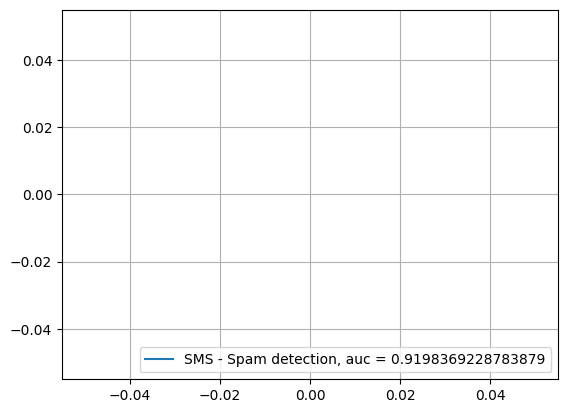

In [29]:
from sklearn.metrics import roc_auc_score, roc_curve
y_pred_proba = mnb.predict_proba(test_matrix)[:,1]

auc = roc_auc_score(y_test, y_pred_proba)
import matplotlib.pyplot as plt
fpr, tpr, _ = roc_curve(y_test, y_pred_proba, pos_label=0)

plt.plot(fpr, tpr, label="SMS - Spam detection, auc = "+str(auc))
plt.legend(loc=4)
plt.grid()


In [ ]:
#transform the tf idf vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tf_idf_vect = TfidfVectorizer()
X_train_tf_idf = tf_idf_vect.fit_transform(corpus)
terms = tf_idf_vect.get_feature_names()

In [ ]:
terms = tf_idf_vect.get_feature_names_out
terms